In [38]:
from keras.datasets import mnist

In [39]:
from keras.models import Sequential

In [40]:
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D


In [41]:
import matplotlib.pyplot as plt


In [43]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

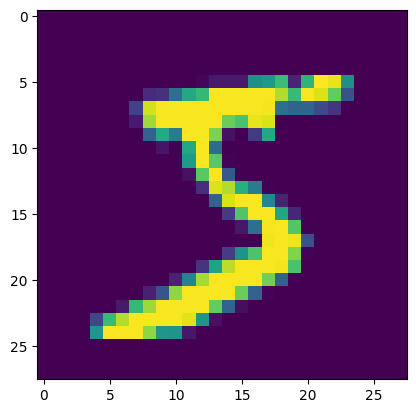

In [44]:
plt.imshow(train_images[0])

In [45]:
train_images,test_images=train_images/255.0,test_images/255.0

In [46]:
import numpy as np

In [47]:
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))

In [48]:
from keras.utils import to_categorical

In [49]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [50]:
cnnmodel=Sequential()

In [51]:
cnnmodel.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
cnnmodel.add(MaxPooling2D((2,2)))
cnnmodel.add(Conv2D(64,(3,3),activation='relu'))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
cnnmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
cnnmodel.fit(train_images,train_labels,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 48ms/step - accuracy: 0.9154 - loss: 0.2812
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 47ms/step - accuracy: 0.9864 - loss: 0.0440
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 47ms/step - accuracy: 0.9916 - loss: 0.0274


In [54]:
predictions=cnnmodel.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


Prediction for image 0: 7


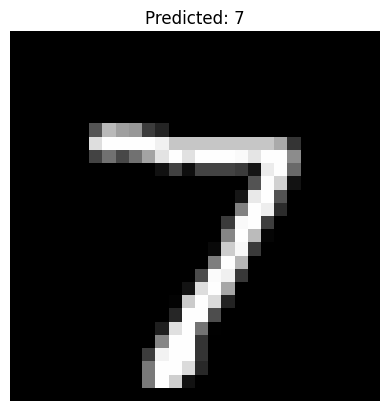

Prediction for image 1: 2


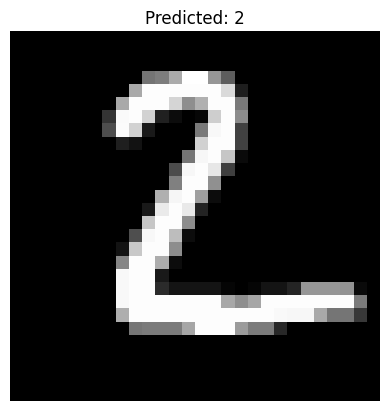

Prediction for image 2: 1


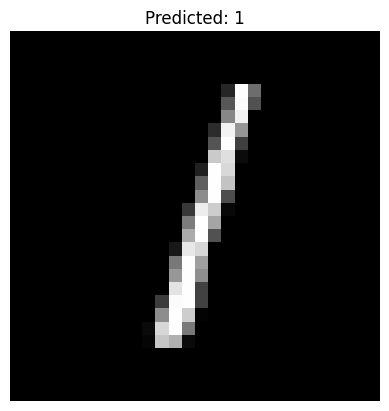

In [57]:
for i in range(3):
  print(f"Prediction for image {i}: {np.argmax(predictions[i])}")
  plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: {np.argmax(predictions[i])}")
  plt.axis('off')
  plt.show()